<a href="https://colab.research.google.com/github/Ehtisham1053/Classification-ML-algorithms/blob/main/Voting_ensamble_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Voting Ensemble in Classification

Voting Ensemble is a machine learning technique that combines multiple models to improve classification performance. It operates on the principle that aggregating predictions from diverse models results in better generalization and robustness. There are two main types of voting:

- **Hard Voting**: Each model casts a "vote" for a class, and the class with the most votes is chosen as the final prediction.
- **Soft Voting**: Instead of discrete votes, the models output probability distributions over classes, and the final prediction is made by averaging these probabilities.

Voting ensembles work well when the individual models are diverse (i.e., they capture different patterns in the data). They are particularly useful for non-linear classification problems where a single model may not perform optimally. By combining multiple models, voting ensembles reduce the risk of overfitting and improve the overall predictive accuracy.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

class VotingEnsemble:
    def __init__(self, models=None):
        """
        Initialize the ensemble with user-defined or default models.
        """
        self.models = models if models else {
            'log_reg': LogisticRegression(),
            'random_forest': RandomForestClassifier(),
            'svc': SVC(probability=True),
            'naive_bayes': GaussianNB(),
            'decision_tree': DecisionTreeClassifier()
        }
        self.ensemble = None

    def train(self, x_train, y_train, selected_models, voting_type='soft'):
        """
        Train the voting ensemble with selected models and user-defined voting type.
        """
        estimators = [(name, self.models[name]) for name in selected_models if name in self.models]
        self.ensemble = VotingClassifier(estimators=estimators, voting=voting_type)
        self.ensemble.fit(x_train, y_train)

    def get_classification_report(self, x_test, y_test):
        """
        Generate the classification report.
        """
        y_pred = self.ensemble.predict(x_test)
        return classification_report(y_test, y_pred)

    def plot_confusion_matrix(self, x_test, y_test):
        """
        Plot the confusion matrix.
        """
        y_pred = self.ensemble.predict(x_test)
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(6,5))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title('Confusion Matrix')
        plt.show()

    def get_model_accuracies(self, x_test, y_test):
            """
            Compute accuracy for each individual model in the ensemble.
            """
            accuracies = {}

            for name, model in self.ensemble.estimators:
                if not hasattr(model, "coef_") and not hasattr(model, "classes_"):
                    model.fit(x_test, y_test)
                y_pred = model.predict(x_test)
                accuracies[name] = accuracy_score(y_test, y_pred)
            return accuracies

##    # Binary Classification Dataset

Binary Classification Example:
              precision    recall  f1-score   support

           0       0.80      0.89      0.84        93
           1       0.90      0.80      0.85       107

    accuracy                           0.84       200
   macro avg       0.85      0.85      0.84       200
weighted avg       0.85      0.84      0.85       200



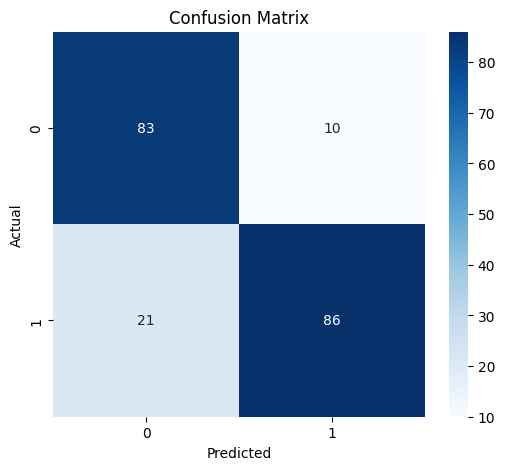

Model Accuracies: {'svc': 0.945}


In [ ]:
X_bin, y_bin = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)
X_train_bin, X_test_bin, y_train_bin, y_test_bin = train_test_split(X_bin, y_bin, test_size=0.2, random_state=42)
print("Binary Classification Example:")
ensemble_bin = VotingEnsemble()
ensemble_bin.train(X_train_bin, y_train_bin, ['svc'], voting_type='hard')
print(ensemble_bin.get_classification_report(X_test_bin, y_test_bin))
ensemble_bin.plot_confusion_matrix(X_test_bin, y_test_bin)
print("Model Accuracies:", ensemble_bin.get_model_accuracies(X_test_bin, y_test_bin))

### multi class classification


Multi-Class Classification Example:
Model Accuracies: {'random_forest': 1.0, 'svc': 0.865}
              precision    recall  f1-score   support

           0       0.80      0.86      0.83        66
           1       0.68      0.71      0.70        63
           2       0.79      0.70      0.75        71

    accuracy                           0.76       200
   macro avg       0.76      0.76      0.76       200
weighted avg       0.76      0.76      0.76       200



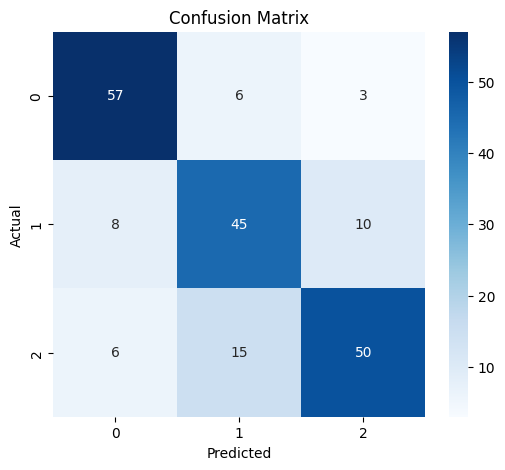

In [ ]:
X_multi, y_multi = make_classification(n_samples=1000, n_features=20, n_classes=3, n_informative=15, random_state=42)
X_train_multi, X_test_multi, y_train_multi, y_test_multi = train_test_split(X_multi, y_multi, test_size=0.2, random_state=42)

print("\nMulti-Class Classification Example:")
ensemble_multi = VotingEnsemble()
ensemble_multi.train(X_train_multi, y_train_multi, [ 'random_forest', 'svc'], voting_type='soft')
print("Model Accuracies:", ensemble_multi.get_model_accuracies(X_test_multi, y_test_multi))
print(ensemble_multi.get_classification_report(X_test_multi, y_test_multi))
ensemble_multi.plot_confusion_matrix(X_test_multi, y_test_multi)

## Importing the dataset from the SNS


Seaborn Dataset (Iris) Example:
Model Accuracies: {'log_reg': 1.0, 'random_forest': 1.0, 'svc': 0.9666666666666667}
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



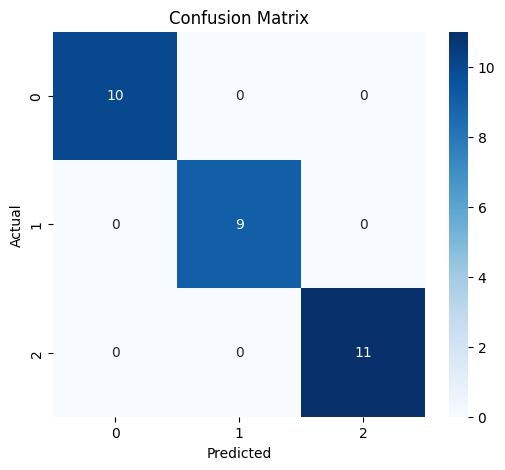

In [ ]:

import seaborn as sns
iris = sns.load_dataset('iris')
X_sns = iris.drop(columns=['species']).values
y_sns = iris['species'].astype('category').cat.codes.values
X_train_sns, X_test_sns, y_train_sns, y_test_sns = train_test_split(X_sns, y_sns, test_size=0.2, random_state=42)

print("\nSeaborn Dataset (Iris) Example:")
ensemble_sns = VotingEnsemble()
ensemble_sns.train(X_train_sns, y_train_sns, ['log_reg', 'random_forest', 'svc'], voting_type='soft')
print("Model Accuracies:", ensemble_sns.get_model_accuracies(X_test_sns, y_test_sns))
print(ensemble_sns.get_classification_report(X_test_sns, y_test_sns))
ensemble_sns.plot_confusion_matrix(X_test_sns, y_test_sns)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

class VotingEnsemble:
    def __init__(self, models=None):
        """
        Initialize the ensemble with user-defined or default models.
        """
        self.models = models if models else {
            'svc': SVC(probability=True),
            'knn': KNeighborsClassifier(n_neighbors=5),
            'naive_bayes': GaussianNB(),
            'mlp': MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=1000)
        }
        self.ensemble = None

    def train(self, x_train, y_train, selected_models, voting_type='soft'):
        """
        Train the voting ensemble with selected models and user-defined voting type.
        """
        estimators = [(name, self.models[name]) for name in selected_models if name in self.models]
        self.ensemble = VotingClassifier(estimators=estimators, voting=voting_type)
        self.ensemble.fit(x_train, y_train)

    def get_model_accuracies(self, x_train, y_train, x_test, y_test):
            """
            Compute accuracy for each individual model in the ensemble.
            """
            accuracies = {"Train Accuracy": {}, "Test Accuracy": {}}
            for name, model in self.ensemble.estimators:
                model.fit(x_train, y_train)
                y_train_pred = model.predict(x_train)
                y_test_pred = model.predict(x_test)
                accuracies["Train Accuracy"][name] = accuracy_score(y_train, y_train_pred)
                accuracies["Test Accuracy"][name] = accuracy_score(y_test, y_test_pred)
            return accuracies

    def get_classification_report(self, x_test, y_test):
        """
        Generate the classification report.
        """
        y_pred = self.ensemble.predict(x_test)
        return classification_report(y_test, y_pred)

    def plot_confusion_matrix(self, x_test, y_test):
        """
        Plot the confusion matrix.
        """
        y_pred = self.ensemble.predict(x_test)
        cm = confusion_matrix(y_test, y_pred)
        plt.figure(figsize=(6,5))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.title('Confusion Matrix')
        plt.show()

Non-Linear Classification Example:

Train Accuracies: {'svc': 0.96875, 'knn': 0.975, 'naive_bayes': 0.8675, 'mlp': 0.97625}
Test Accuracies: {'svc': 0.98, 'knn': 0.975, 'naive_bayes': 0.855, 'mlp': 0.99}

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       100
           1       0.98      0.98      0.98       100

    accuracy                           0.98       200
   macro avg       0.98      0.98      0.98       200
weighted avg       0.98      0.98      0.98       200



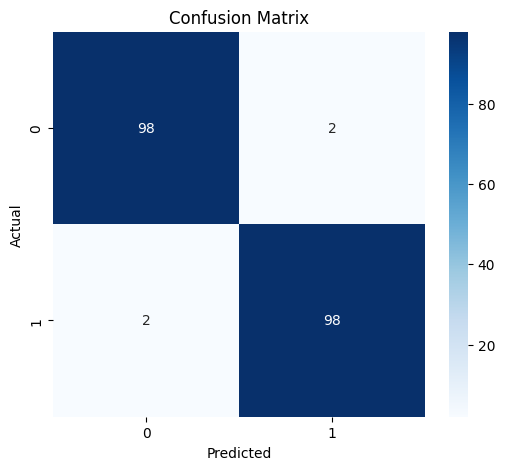

In [ ]:
X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Non-Linear Classification Example:")
ensemble = VotingEnsemble()
ensemble.train(X_train, y_train, ['svc', 'knn', 'naive_bayes', 'mlp'], voting_type='soft')


accuracies = ensemble.get_model_accuracies(X_train, y_train, X_test, y_test)
print("\nTrain Accuracies:", accuracies["Train Accuracy"])
print("Test Accuracies:", accuracies["Test Accuracy"])
print("\nClassification Report:\n", ensemble.get_classification_report(X_test, y_test))
ensemble.plot_confusion_matrix(X_test, y_test)


## Voting ensamble classification

Test Accuracy: 0.98

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       100
           1       0.98      0.98      0.98       100

    accuracy                           0.98       200
   macro avg       0.98      0.98      0.98       200
weighted avg       0.98      0.98      0.98       200



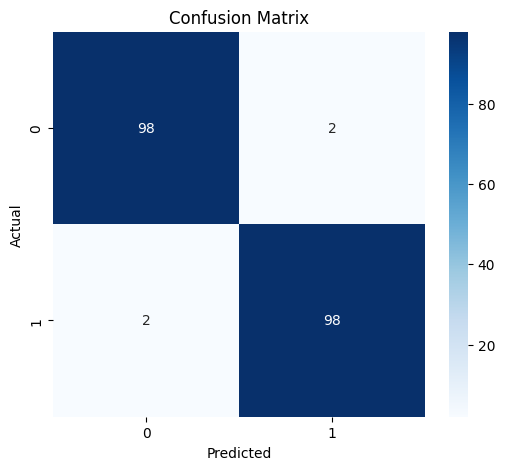

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split

X, y = make_moons(n_samples=1000, noise=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

svc1 = SVC(probability=True, kernel='rbf')
svc2 = SVC(probability=True, kernel='poly', degree=3)
knn = KNeighborsClassifier(n_neighbors=5)
naive_bayes = GaussianNB()
mlp = MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=1000)

voting_clf = VotingClassifier(
    estimators=[
        ('svc_rbf', svc1),
        ('svc_poly', svc2),
        ('knn', knn),
        ('naive_bayes', naive_bayes),
        ('mlp', mlp)
    ],
    voting='soft'
)

voting_clf.fit(X_train, y_train)
y_pred = voting_clf.predict(X_test)

print("Test Accuracy:", accuracy_score(y_test, y_pred))

print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


# GUI starts here


## load the data set

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
data = load_breast_cancer()
X, y = data.data, data.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### App start here

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import ipywidgets as widgets
from IPython.display import display


def get_models():
    return {
        'Logistic Regression': LogisticRegression(),
        'SVM': SVC(probability=True),
        'Decision Tree': DecisionTreeClassifier(),
        'Random Forest': RandomForestClassifier()
    }


models_dict = get_models()
model_selection_widgets = {}

for model_name in models_dict.keys():
    model_selection_widgets[model_name] = widgets.IntSlider(
        value=0, min=0, max=5, step=1,
        description=f'{model_name}',
        style={'description_width': 'initial'}
    )


voting_type = widgets.Dropdown(
    options=['hard', 'soft'],
    value='soft',
    description='Voting Type'
)

train_button = widgets.Button(description='Train Ensemble')
out = widgets.Output()


def train_voting_ensemble(selected_models, voting_type, X_train, y_train):
    model_instances = []
    for name, count in selected_models.items():
        for i in range(count):
            model_instances.append((f'{name}_{i+1}', models_dict[name]))

    if not model_instances:
        return None

    ensemble = VotingClassifier(estimators=model_instances, voting=voting_type)
    ensemble.fit(X_train, y_train)
    return ensemble


def plot_decision_boundary(model, X, y, title):
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)
    model.fit(X_pca, y)

    x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
    y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.3)
    sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=y, edgecolor='k')
    plt.title(title)
    plt.show()

def on_train_clicked(b):
    selected_models = {name: widget.value for name, widget in model_selection_widgets.items() if widget.value > 0}
    if not selected_models:
        with out:
            out.clear_output()
            print("Select at least one model!")
        return

    ensemble = train_voting_ensemble(selected_models, voting_type.value, X_train, y_train)
    if ensemble is None:
        return

    y_pred = ensemble.predict(X_test)

    with out:
        out.clear_output()
        print("Classification Report:")
        print(classification_report(y_test, y_pred))
        print("Confusion Matrix:")
        sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
        plt.show()
        plot_decision_boundary(ensemble, X_train, y_train, "Decision Boundary")

train_button.on_click(on_train_clicked)


display(*model_selection_widgets.values(), voting_type, train_button, out)


IntSlider(value=0, description='Logistic Regression', max=5, style=SliderStyle(description_width='initial'))

IntSlider(value=0, description='SVM', max=5, style=SliderStyle(description_width='initial'))

IntSlider(value=0, description='Decision Tree', max=5, style=SliderStyle(description_width='initial'))

IntSlider(value=0, description='Random Forest', max=5, style=SliderStyle(description_width='initial'))

Dropdown(description='Voting Type', index=1, options=('hard', 'soft'), value='soft')

Button(description='Train Ensemble', style=ButtonStyle())

Output()

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
